In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import itertools
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import RFECV
import xgboost as xgb

# Read the Excel files
df1 = pd.read_excel('df_whole_with_altlex_part1_2.xlsx')
df2 = pd.read_excel('df_whole_with_altlex_part2_2.xlsx')

df = pd.concat([df1, df2], axis=0, ignore_index=True)
#df = pd.read_excel('df_cleaned_with_altlex.xlsx')


In [2]:
df_backup = df

In [3]:
# Convert boolean columns to integers
features_to_change = ['Current_Word_Status',
       'Is_Current_Word_Capitalized', 'One_Word_Before_Current_Word_Status',
       'Two_Word_Before_Current_Word_Status',
       'Three_Word_Before_Current_Word_Status',
       'One_Word_After_Current_Word_Status',
       'Two_Word_After_Current_Word_Status',
       'Three_Word_After_Current_Word_Status',
       'Is_One_Word_Before_Current_Word_Capitalized',
       'Is_Two_Word_Before_Current_Word_Capitalized',
       'Is_Three_Word_Before_Current_Word_Capitalized',
       'Is_One_Word_After_Current_Word_Capitalized',
       'Is_Two_Word_After_Current_Word_Capitalized',
       'Is_Three_Word_After_Current_Word_Capitalized',
       'Number_of_Words_After_Current_Word_in_Sentence',
       'Number_of_Words_Before_Current_Word_in_Sentence',
       'Length_of_Current_Word', 'Length_of_Sentence_of_the_Current_Word',
       'Distance_to_Previous_Verb', 'Distance_to_Next_Verb', 'Word_ID', 'prev_verb_ID', 
       'next_verb_ID', 'Word-1_ID', 'Word-2_ID', 'Word-3_ID', 'Word+1_ID', 'Word+2_ID', 'Word+3_ID', 'prev_verb_check', 'next_verb_check']

default_value = 0  # Example default value
for col in features_to_change:
    df[col] = df[col].fillna(default_value).astype(int)

In [4]:
# Allocate pairs to train, test, and development sets
test_files = ['wsj_2300.txt',
 'wsj_2301.txt',
 'wsj_2302.txt',
 'wsj_2303.txt',
 'wsj_2305.txt',
 'wsj_2306.txt',
 'wsj_2308.txt',
 'wsj_2309.txt',
 'wsj_2310.txt',
 'wsj_2311.txt',
 'wsj_2313.txt',
 'wsj_2314.txt',
 'wsj_2315.txt',
 'wsj_2316.txt',
 'wsj_2317.txt',
 'wsj_2319.txt',
 'wsj_2320.txt',
 'wsj_2321.txt',
 'wsj_2322.txt',
 'wsj_2323.txt',
 'wsj_2324.txt',
 'wsj_2325.txt',
 'wsj_2326.txt',
 'wsj_2327.txt',
 'wsj_2328.txt',
 'wsj_2329.txt',
 'wsj_2330.txt',
 'wsj_2331.txt',
 'wsj_2332.txt',
 'wsj_2333.txt',
 'wsj_2334.txt',
 'wsj_2335.txt',
 'wsj_2336.txt',
 'wsj_2337.txt',
 'wsj_2338.txt',
 'wsj_2339.txt',
 'wsj_2340.txt',
 'wsj_2341.txt',
 'wsj_2342.txt',
 'wsj_2343.txt',
 'wsj_2344.txt',
 'wsj_2345.txt',
 'wsj_2346.txt',
 'wsj_2347.txt',
 'wsj_2348.txt',
 'wsj_2350.txt',
 'wsj_2351.txt',
 'wsj_2352.txt',
 'wsj_2353.txt',
 'wsj_2354.txt',
 'wsj_2355.txt',
 'wsj_2356.txt',
 'wsj_2357.txt',
 'wsj_2358.txt',
 'wsj_2359.txt',
 'wsj_2360.txt',
 'wsj_2361.txt',
 'wsj_2362.txt',
 'wsj_2363.txt',
 'wsj_2364.txt',
 'wsj_2365.txt',
 'wsj_2366.txt',
 'wsj_2367.txt',
 'wsj_2368.txt',
 'wsj_2369.txt',
 'wsj_2370.txt',
 'wsj_2371.txt',
 'wsj_2372.txt',
 'wsj_2373.txt',
 'wsj_2374.txt',
 'wsj_2375.txt',
 'wsj_2376.txt',
 'wsj_2377.txt',
 'wsj_2378.txt',
 'wsj_2379.txt',
 'wsj_2380.txt',
 'wsj_2381.txt',
 'wsj_2382.txt',
 'wsj_2383.txt',
 'wsj_2384.txt',
 'wsj_2386.txt',
 'wsj_2387.txt',
 'wsj_2391.txt',
 'wsj_2392.txt',
 'wsj_2393.txt',
 'wsj_2394.txt',
 'wsj_2395.txt',
 'wsj_2396.txt',
 'wsj_2397.txt',
 'wsj_2398.txt',
 'wsj_2399.txt']

dev_files = ['wsj_2200.txt',
 'wsj_2201.txt',
 'wsj_2202.txt',
 'wsj_2203.txt',
 'wsj_2204.txt',
 'wsj_2205.txt',
 'wsj_2206.txt',
 'wsj_2207.txt',
 'wsj_2208.txt',
 'wsj_2209.txt',
 'wsj_2210.txt',
 'wsj_2211.txt',
 'wsj_2212.txt',
 'wsj_2213.txt',
 'wsj_2214.txt',
 'wsj_2215.txt',
 'wsj_2216.txt',
 'wsj_2217.txt',
 'wsj_2218.txt',
 'wsj_2219.txt',
 'wsj_2221.txt',
 'wsj_2222.txt',
 'wsj_2223.txt',
 'wsj_2224.txt',
 'wsj_2225.txt',
 'wsj_2226.txt',
 'wsj_2227.txt',
 'wsj_2228.txt',
 'wsj_2229.txt',
 'wsj_2230.txt',
 'wsj_2231.txt',
 'wsj_2232.txt',
 'wsj_2233.txt',
 'wsj_2234.txt',
 'wsj_2235.txt',
 'wsj_2237.txt',
 'wsj_2238.txt',
 'wsj_2239.txt',
 'wsj_2240.txt',
 'wsj_2241.txt',
 'wsj_2242.txt',
 'wsj_2243.txt',
 'wsj_2244.txt',
 'wsj_2245.txt',
 'wsj_2246.txt',
 'wsj_2247.txt',
 'wsj_2248.txt',
 'wsj_2249.txt',
 'wsj_2250.txt',
 'wsj_2251.txt',
 'wsj_2252.txt',
 'wsj_2253.txt',
 'wsj_2254.txt',
 'wsj_2255.txt',
 'wsj_2256.txt',
 'wsj_2257.txt',
 'wsj_2258.txt',
 'wsj_2259.txt',
 'wsj_2260.txt',
 'wsj_2261.txt',
 'wsj_2262.txt',
 'wsj_2264.txt',
 'wsj_2265.txt',
 'wsj_2266.txt',
 'wsj_2267.txt',
 'wsj_2268.txt',
 'wsj_2269.txt',
 'wsj_2270.txt',
 'wsj_2271.txt',
 'wsj_2272.txt',
 'wsj_2273.txt',
 'wsj_2274.txt',
 'wsj_2275.txt',
 'wsj_2276.txt',
 'wsj_2277.txt',
 'wsj_2278.txt',
 'wsj_2280.txt',
 'wsj_2281.txt',
 'wsj_2282.txt']
test_files = [file[:-4] for file in test_files]
dev_files = [file[:-4] for file in dev_files]
train_files = []
for e in df['File_Name'].unique():
    if e not in test_files and e not in dev_files:
        train_files.append(e)
# Create datasets based on selected file pairs
train_set = df[df['File_Name'].isin(train_files)]
test_set = df[df['File_Name'].isin(test_files)]
dev_set = df[df['File_Name'].isin(dev_files)]

In [5]:
features = ['Current_Word_Status',
       'Is_Current_Word_Capitalized', 'One_Word_Before_Current_Word_Status',
       'Two_Word_Before_Current_Word_Status',
       'Three_Word_Before_Current_Word_Status',
       'One_Word_After_Current_Word_Status',
       'Two_Word_After_Current_Word_Status',
       'Three_Word_After_Current_Word_Status',
       'Is_One_Word_Before_Current_Word_Capitalized',
       'Is_Two_Word_Before_Current_Word_Capitalized',
       'Is_Three_Word_Before_Current_Word_Capitalized',
       'Is_One_Word_After_Current_Word_Capitalized',
       'Is_Two_Word_After_Current_Word_Capitalized',
       'Is_Three_Word_After_Current_Word_Capitalized',
       'Number_of_Words_After_Current_Word_in_Sentence',
       'Number_of_Words_Before_Current_Word_in_Sentence',
       'Length_of_Current_Word', 'Length_of_Sentence_of_the_Current_Word',
       'Distance_to_Previous_Verb', 'Distance_to_Next_Verb',  'Word_ID', 'prev_verb_ID', 
       'next_verb_ID', 'Word-1_ID', 'Word-2_ID', 'Word-3_ID', 'Word+1_ID', 'Word+2_ID', 'Word+3_ID', 'prev_verb_check', 'next_verb_check']


In [6]:
# List of datasets
datasets = [('Train Set', train_set), ('Test Set', test_set), ('Dev Set', dev_set)]

for name, dataset in datasets:
    label_frequencies = dataset['Label'].value_counts()
    label_rates = dataset['Label'].value_counts(normalize=True)  # This calculates the proportion
    
    print(f"{name} Label Frequencies:\n{label_frequencies}\n")
    print(f"{name} Label Rates:\n{label_rates}\n")

Train Set Label Frequencies:
Label
0    1032851
1      23848
2       4499
Name: count, dtype: int64

Train Set Label Rates:
Label
0    0.973288
1    0.022473
2    0.004240
Name: proportion, dtype: float64

Test Set Label Frequencies:
Label
0    54164
1     1245
2      238
Name: count, dtype: int64

Test Set Label Rates:
Label
0    0.973350
1    0.022373
2    0.004277
Name: proportion, dtype: float64

Dev Set Label Frequencies:
Label
0    38656
1      953
2      159
Name: count, dtype: int64

Dev Set Label Rates:
Label
0    0.972038
1    0.023964
2    0.003998
Name: proportion, dtype: float64



In [6]:
combined_set = pd.concat([train_set,dev_set])
combined_set

,Current_Word,Current_Word_Status,Is_Punct,Is_Current_Word_Capitalized,Length_of_Current_Word,Number_of_Words_After_Current_Word_in_Sentence,Number_of_Words_Before_Current_Word_in_Sentence,One_Word_Before_Current_Word,Two_Word_Before_Current_Word,Three_Word_Before_Current_Word,...,Word-2_ID,Word-3_ID,Word+1_ID,Word+2_ID,Word+3_ID,verb_check,prev_verb_check,next_verb_check,prev_verb_check_minus_1,next_verb_check_minus_1
0,Pierre,0,False,1,6,17,0,NaN,NaN,NaN,...,3,4,0,0,0,1,0,0,0,0
1,Vinken,0,False,1,6,16,1,Pierre,NaN,NaN,...,4,5,1,0,0,1,0,0,0,0
2,",",0,True,0,1,15,2,Vinken,Pierre,NaN,...,5,6,2,1,0,1,0,0,0,0
3,61,0,False,0,2,14,3,",",Vinken,Pierre,...,6,3,3,2,1,1,0,0,0,0
4,years,0,False,0,5,13,4,61,",",Vinken,...,3,7,4,3,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156608,3.9,0,False,0,3,4,44,$,and,1988,...,83,1280,464,155,1260,1,0,0,0,0
1156609,million,0,False,0,7,3,45,3.9,$,and,...,1280,17,2562,464,155,1,0,0,0,0
1156610,in,0,False,0,2,2,46,million,3.9,$,...,17,0,540,2562,464,1,0,0,0,0
1156611,1985,0,False,0,4,1,47,in,million,3.9,...,0,0,83,540,2562,1,0,0,0,0


In [8]:
# Step 1 & 2: Create a set of words where Label equals 1
candidate_connectives = set(combined_set[combined_set['Label'] == 1]['Current_Word'])

# Step 3: Filter the dataframe for rows where Current_Word is in the set
filtered_df = combined_set[combined_set['Current_Word'].isin(candidate_connectives)]

# Step 4: Count the number of rows in the filtered dataframe
count_rows = filtered_df.shape[0]

In [9]:
const = len(combined_set['Label'])/count_rows
const

3.31002116554826

In [10]:
# Initialize dictionaries
zeroprev, oneprev, zeronext, onenext = {}, {}, {}, {}

# Populate dictionaries with frequencies according to respective target values
for index, row in combined_set.iterrows():
    # For 'prev_verb_token'
    if row['Label'] == 0 and row['Current_Word'] in candidate_connectives:
        # Check if the key exists in the dictionary, initialize if not
        if row['prev_verb_token'] not in zeroprev:
            zeroprev[row['prev_verb_token']] = 0
        zeroprev[row['prev_verb_token']] += 1

        # Repeat for 'next_verb_token'
        if row['next_verb_token'] not in zeronext:
            zeronext[row['next_verb_token']] = 0
        zeronext[row['next_verb_token']] += 1
    else:
        # Repeat the checks and initialization for the 'oneprev' and 'onenext' dictionaries
        if row['prev_verb_token'] not in oneprev:
            oneprev[row['prev_verb_token']] = 0
        oneprev[row['prev_verb_token']] += 1

        if row['next_verb_token'] not in onenext:
            onenext[row['next_verb_token']] = 0
        onenext[row['next_verb_token']] += 1



def place_in_max_list(key_value_pairs, other_dict, pointer):
    # Initialize lists to hold keys
    max_list = []
    
    # Loop through each key-value pair in the primary dictionary
    for key, value in key_value_pairs.items():
        # Initialize max value as the current value and list as the max list
        if pointer:
            max_val = value * const
            other_value = other_dict.get(key, 0)
            belongs_to_max_list = other_value <= max_val
        else:
            max_val = value 
            other_value = other_dict.get(key, 0) * const
            belongs_to_max_list = other_value <= max_val
        
        # If the key belongs to max list based on its value, add it
        if belongs_to_max_list:
            max_list.append(key)
            
    return max_list

# Generate lists based on max frequency across respective dictionaries
zeroprev_list = place_in_max_list(zeroprev, oneprev, 0)
oneprev_list = place_in_max_list(oneprev, zeroprev, 1)
zeronext_list = place_in_max_list(zeronext, onenext, 0)
onenext_list = place_in_max_list(onenext, zeronext, 1)

# Combine all class keys to ensure coverage



In [11]:
len(zeronext_list)

3

In [12]:
# Step 4: Apply Lists to Each DataFrame (train, test, dev)
def add_new_columns(df):
    df['zeroprev'] = df['prev_verb_token'].apply(lambda x: 1 if x in zeroprev_list else 0)
    df['oneprev'] = df['prev_verb_token'].apply(lambda x: 1 if x in oneprev_list else 0)
    df['zeronext'] = df['next_verb_token'].apply(lambda x: 1 if x in zeronext_list else 0)
    df['onenext'] = df['next_verb_token'].apply(lambda x: 1 if x in onenext_list else 0)
    return df

combined_set = add_new_columns(combined_set)
test_set = add_new_columns(test_set)


C:\Users\erolc\AppData\Local\Temp\ipykernel_3740\1147936063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zeroprev'] = df['prev_verb_token'].apply(lambda x: 1 if x in zeroprev_list else 0)
C:\Users\erolc\AppData\Local\Temp\ipykernel_3740\1147936063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oneprev'] = df['prev_verb_token'].apply(lambda x: 1 if x in oneprev_list else 0)
C:\Users\erolc\AppData\Local\Temp\ipykernel_3740\1147936063.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [7]:
best_params = {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 500, 'max_delta_step': 3, 'min_child_weight': 5}

In [8]:

import time
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Assuming the rest of your code is correct and 'best_params', 'train_set', 'test_set', and 'boolean_columns' are defined elsewhere

# Split for same distribution data - connective-based (Inference time with best parameters and features.)

# Split the rest of the data into training and testing sets
X_train, X_test, y_train, y_test = combined_set[features], test_set[features], combined_set['Label'], test_set['Label']

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Start timing
start_time = time.time()
# Train the model
xgb_clf.fit(X_train, y_train)
# End timing
end_time = time.time()

# Start timing
start_time_2 = time.time()

# Predict on the test set
y_pred = xgb_clf.predict(X_test)

# End timing
end_time_2 = time.time()

# Calculate inference time
inference_time = end_time - start_time
inference_time_2 = end_time_2 - start_time_2
print(f"Training Time: {inference_time} seconds")
print(f"Inference Time: {inference_time_2} seconds")

# Evaluate the model
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_score, recall_score, f1_score

# Macro average
overall_precision_macro = precision_score(y_test, y_pred, average='macro')
overall_recall_macro = recall_score(y_test, y_pred, average='macro')
overall_f1_score_macro = f1_score(y_test, y_pred, average='macro')

print(f"Overall Precision (Macro): {overall_precision_macro}")
print(f"Overall Recall (Macro): {overall_recall_macro}")
print(f"Overall F1 Score (Macro): {overall_f1_score_macro}")

# Weighted average
overall_precision_weighted = precision_score(y_test, y_pred, average='weighted')
overall_recall_weighted = recall_score(y_test, y_pred, average='weighted')
overall_f1_score_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Overall Precision (Weighted): {overall_precision_weighted}")
print(f"Overall Recall (Weighted): {overall_recall_weighted}")
print(f"Overall F1 Score (Weighted): {overall_f1_score_weighted}")

# Micro average (if needed)
overall_precision_micro = precision_score(y_test, y_pred, average='micro')
overall_recall_micro = recall_score(y_test, y_pred, average='micro')
overall_f1_score_micro = f1_score(y_test, y_pred, average='micro')

print(f"Overall Precision (Micro): {overall_precision_micro}")
print(f"Overall Recall (Micro): {overall_recall_micro}")
print(f"Overall F1 Score (Micro): {overall_f1_score_micro}")


Training Time: 3073.90115070343 seconds
Inference Time: 1.337092638015747 seconds
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     54164
           1       0.92      0.81      0.86      1245
           2       0.92      0.32      0.47       238

    accuracy                           0.99     55647
   macro avg       0.94      0.71      0.78     55647
weighted avg       0.99      0.99      0.99     55647

Overall Precision (Macro): 0.9425799174692574
Overall Recall (Macro): 0.7099540010593984
Overall F1 Score (Macro): 0.7771696395323828
Overall Precision (Weighted): 0.9910022109879638
Overall Recall (Weighted): 0.9914101389113519
Overall F1 Score (Weighted): 0.9905089653956739
Overall Precision (Micro): 0.9914101389113519
Overall Recall (Micro): 0.9914101389113519
Overall F1 Score (Micro): 0.9914101389113519


In [9]:
y_pred_imbalanced = y_pred

In [10]:
# Assuming test_set is your original DataFrame and y_pred is your predictions array
# Step 1: Create df_pred with just the Current_Word and File_Name columns
df_pred_balanced_weights = test_set[['Current_Word', 'File_Name']].copy()

# Step 2: Add the y_pred array as a new column to df_pred
df_pred_balanced_weights['pred'] = y_pred

# Now df_pred has the Current_Word, File_Name, and pred columns
# Write df_pred to an Excel file
df_pred_balanced_weights.to_excel("df_pred_imbalanced_weights_pdtb_2.xlsx", index=False)


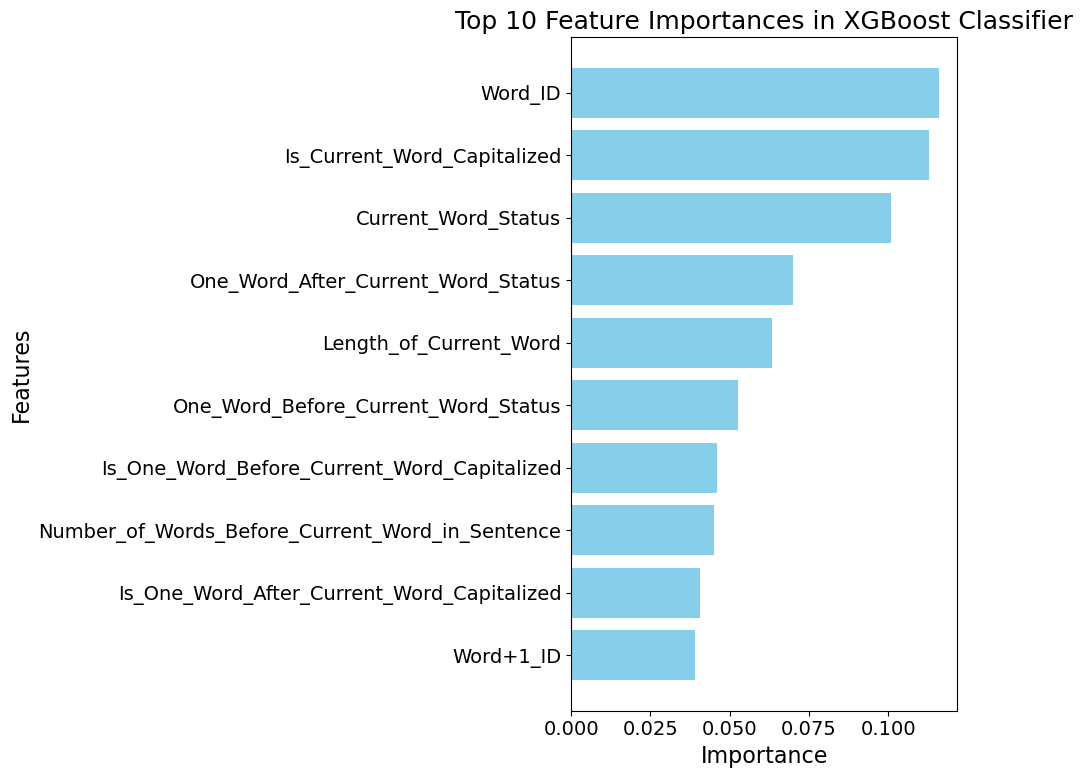

In [11]:
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 14})  # You can adjust the number to your preference

# Get feature importances
feature_importances = xgb_clf.feature_importances_

# Combine feature names and their importances
features_and_importances = zip(features, feature_importances)

# Sort the features by importance
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Select only the top 10 most important features
top_features_and_importances = sorted_features_and_importances[:10]

# Extract feature names and their importances for the top 10
feature_names, importances = zip(*top_features_and_importances)

# Create a bar chart for the top 10 feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance', fontsize=16)  # Increase font size for x-axis label
plt.ylabel('Features', fontsize=16)  # Increase font size for y-axis label
plt.title('Top 10 Feature Importances in XGBoost Classifier', fontsize=18)  # Increase font size for title
plt.xticks(fontsize=14)  # Increase font size for x-axis ticks
plt.yticks(fontsize=14)  # Increase font size for y-axis ticks
plt.gca().invert_yaxis()
plt.tight_layout()  # Adjust layout to make room for the larger text
plt.show()


In [12]:

import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import time

# Assuming the rest of your code is correct and 'best_params', 'train_set', 'test_set', and 'boolean_columns' are defined elsewhere

# Split the rest of the data into training and testing sets
X_train, X_test, y_train, y_test = combined_set[features], test_set[features], combined_set['Label'], test_set['Label']

# Remove scale_pos_weight for multi-class classification
xgb_clf = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Optionally compute class weights manually and use them during training
# Example: Calculate class weights inversely proportional to class frequencies
class_weights = len(y_train) / (y_train.nunique() * y_train.value_counts())
weights = y_train.map(class_weights)

# Start timing for training
start_time = time.time()

# Train the model with optional weights
xgb_clf.fit(X_train, y_train, sample_weight=weights)

# End timing for training
end_time = time.time()

# Start timing for inference
start_time_2 = time.time()
# Predict on the test set
y_pred = xgb_clf.predict(X_test)
# End timing for inference
end_time_2 = time.time()

# Calculate and print inference times
inference_time = end_time - start_time
inference_time_2 = end_time_2 - start_time_2
print(f"Training Time: {inference_time} seconds")
print(f"Inference Time: {inference_time_2} seconds")

# Evaluate the model
print(classification_report(y_test, y_pred))

from sklearn.metrics import precision_score, recall_score, f1_score

# Macro average
overall_precision_macro = precision_score(y_test, y_pred, average='macro')
overall_recall_macro = recall_score(y_test, y_pred, average='macro')
overall_f1_score_macro = f1_score(y_test, y_pred, average='macro')

print(f"Overall Precision (Macro): {overall_precision_macro}")
print(f"Overall Recall (Macro): {overall_recall_macro}")
print(f"Overall F1 Score (Macro): {overall_f1_score_macro}")

# Weighted average
overall_precision_weighted = precision_score(y_test, y_pred, average='weighted')
overall_recall_weighted = recall_score(y_test, y_pred, average='weighted')
overall_f1_score_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"Overall Precision (Weighted): {overall_precision_weighted}")
print(f"Overall Recall (Weighted): {overall_recall_weighted}")
print(f"Overall F1 Score (Weighted): {overall_f1_score_weighted}")

# Micro average (if needed)
overall_precision_micro = precision_score(y_test, y_pred, average='micro')
overall_recall_micro = recall_score(y_test, y_pred, average='micro')
overall_f1_score_micro = f1_score(y_test, y_pred, average='micro')

print(f"Overall Precision (Micro): {overall_precision_micro}")
print(f"Overall Recall (Micro): {overall_recall_micro}")
print(f"Overall F1 Score (Micro): {overall_f1_score_micro}")


Training Time: 3394.9938082695007 seconds
Inference Time: 2.0249221324920654 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     54164
           1       0.74      0.91      0.81      1245
           2       0.56      0.53      0.54       238

    accuracy                           0.99     55647
   macro avg       0.76      0.81      0.78     55647
weighted avg       0.99      0.99      0.99     55647

Overall Precision (Macro): 0.7645764954780364
Overall Recall (Macro): 0.8074020145497819
Overall F1 Score (Macro): 0.7829067617815549
Overall Precision (Weighted): 0.9882867588732192
Overall Recall (Weighted): 0.9870792675256528
Overall F1 Score (Weighted): 0.9874806201860535
Overall Precision (Micro): 0.9870792675256528
Overall Recall (Micro): 0.9870792675256528
Overall F1 Score (Micro): 0.9870792675256528


In [13]:
y_pred_balanced = y_pred

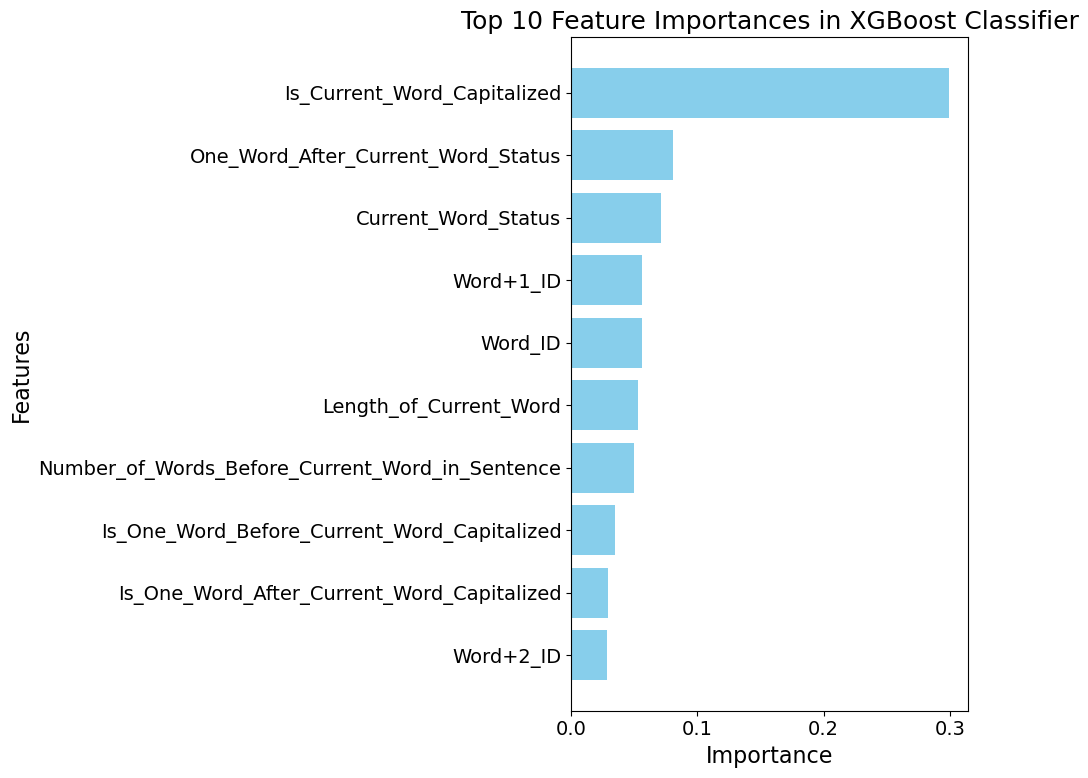

In [14]:
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 14})  # You can adjust the number to your preference

# Get feature importances
feature_importances = xgb_clf.feature_importances_

# Combine feature names and their importances
features_and_importances = zip(features, feature_importances)

# Sort the features by importance
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Select only the top 10 most important features
top_features_and_importances = sorted_features_and_importances[:10]

# Extract feature names and their importances for the top 10
feature_names, importances = zip(*top_features_and_importances)

# Create a bar chart for the top 10 feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance', fontsize=16)  # Increase font size for x-axis label
plt.ylabel('Features', fontsize=16)  # Increase font size for y-axis label
plt.title('Top 10 Feature Importances in XGBoost Classifier', fontsize=18)  # Increase font size for title
plt.xticks(fontsize=14)  # Increase font size for x-axis ticks
plt.yticks(fontsize=14)  # Increase font size for y-axis ticks
plt.gca().invert_yaxis()
plt.tight_layout()  # Adjust layout to make room for the larger text
plt.show()


In [15]:
# Assuming test_set is your original DataFrame and y_pred is your predictions array
# Step 1: Create df_pred with just the Current_Word and File_Name columns
df_pred_imbalanced_weights = test_set[['Current_Word', 'File_Name']].copy()

# Step 2: Add the y_pred array as a new column to df_pred
df_pred_imbalanced_weights['pred'] = y_pred

# Now df_pred has the Current_Word, File_Name, and pred columns
# Write df_pred to an Excel file
df_pred_imbalanced_weights.to_excel("df_pred_balanced_weights_pdtb.xlsx", index=False)
